# Quicksort Algorithm

Distribution of the number of comparisons necessary to sort an array using the quicksort algorithm. Inspired by the materials belonging to: 
https://mast.queensu.ca/~stat455/.

Text(0.5, 1.0, 'Quicksort - Number of Comparisons (array size: 10)')

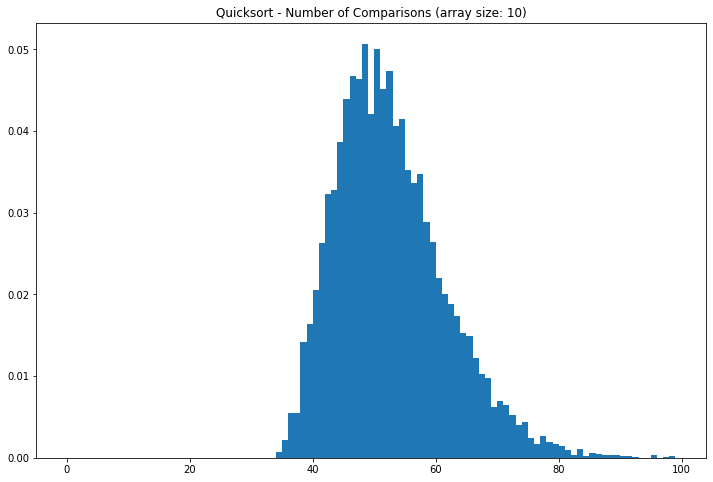

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_array(n):
    """
    Get a shuffled array of integers (without duplicates)
    """
    return np.random.permutation(list(range(n)))



def quicksort(x):
    """
    Returns sorted array and the number of comparisons made in sorting the array.
    """
    
    l = len(x)
    n = 0
    
    if l == 0 or l == 1: # no sorting needed
        return n,x
    
    else:
        pivot = np.random.choice(x) # randomly choose a pivot from array
        H = []
        L = []
        for i in range(len(x)): # assign elements to H(igher) or L(ower) array depending on size relative to pivot
            n+=1
            if x[i] > pivot:
                H+=[x[i]]
            else:
                L+=[x[i]]
        
        n_l, L = quicksort(L) # recursively call quicksort on H and L arrays.s
        n_h, H = quicksort(H)
        
        n = n+n_l+n_h
        
        return n,L+H
    

# simulation
n_trials = 10000
array_length = 10

n_comparisons = []
for i in range(n_trials):
    
    x = get_array(array_length)
    n,_ = quicksort(x)
    
    n_comparisons+=[n]
    
    
plt.figure(figsize=(12,8))
_ = plt.hist(n_comparisons,bins = list(range(array_length**2)),density=True)
plt.title('Quicksort - Number of Comparisons (array size: %i)' % array_length)